## BCycle Starter Code

In the following notebook, we have provided several examples of types of exploratory analysis we would do on these datasets. They are by no means exhaustive, but it should provide with code to do similar/further work!

## Getting the data from Blob Storage
Our data is stored inside of Azure Blob Storage. Following is the code to get it to your notebook.

In [ ]:
# If you are running this code on your own computer, uncomment the following line.
# !pip install azure

In [ ]:
from azure.storage.blob import BlockBlobService
import os

In [3]:
# You should only run this code once.
!mkdir bcycle

In [4]:
local_path=os.getcwd() + "/bcycle" # Where the data will be stored.
blob_account_name = "mldsdatahack2019diag" # Don't edit!
blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # Don't edit!

mycontainer = "datahackdata2019"       # Don't edit!

In [5]:
import azure
from azure.storage.blob import BlockBlobService

# Create a client to get data
blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
# Get the data
blob_service.get_blob_to_path("datahackdata2019", "BCycleAustin.csv", os.path.join(local_path, "BCycleAustin.csv"))

## Load Data

In [6]:
# Yo should see BCycleAustin.csv
!ls bcycle

BCycleAustin.csv


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read in data
df = pd.read_csv('bcycle/BCycleAustin.csv')

In [9]:
# See the first few rows.
df.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982
1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982
2,9900289011,Local365,190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,9,2015-10-01 19:12:27,30.27041,-97.75046,30.25579,-97.73982
3,9900292552,Walk Up,354.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,14,2015-10-04 13:12:41,30.27041,-97.75046,30.25579,-97.73982
4,9900293709,Local365,20.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,11,2015-10-04 13:12:56,30.27041,-97.75046,30.25579,-97.73982


## Example 1: BCycle Usage over Time

In [10]:
# Convert the checkout datetime from string to an actual date-time object.
df['Checkout DateTime'] = pd.to_datetime(df['Checkout DateTime'])

In [11]:
# extract year-month to bin for plot
df['Checkout YR-MO'] = pd.to_datetime(df['Checkout DateTime'].apply(lambda x :
                                                      str(x.year) + '-' + str(x.month)))

In [12]:
# All the cycles checked out in the same month are in the same group
groups = df.groupby(['Checkout YR-MO']).count()

In [13]:
# See first few columns
groups.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude
Checkout YR-MO,,,,,,,,,,,,,
2013-12-01,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
2014-01-01,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358,3358
2014-02-01,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297
2014-03-01,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547,23547
2014-04-01,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624,12624


In [14]:
groups = groups['Trip ID']
groups.head()

Checkout YR-MO
2013-12-01     1457
2014-01-01     3358
2014-02-01     5297
2014-03-01    23547
2014-04-01    12624
Name: Trip ID, dtype: int64

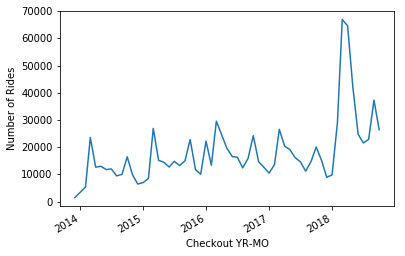

In [15]:
# Number of rides per month
groups.plot()
plt.ylabel('Number of Rides')
plt.show()

### Follow Up

From this plot, we can see a large spike in 2018, what factors could have led to this? (e.g. opening up to UT). 

A natural follow-up question then, is how does the individual Kiosk activity change? (left open if interested)

## Example 2: Mapping Kiosks

Resource for the following: https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [16]:
# Installing folium for nice map visualizations
!pip install folium

    100% |████████████████████████████████| 92kB 11.0MB/s ta 0:00:01
You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import folium

In [18]:
# first extract the kiosk locations
df_kiosks = df[['Checkout Kiosk','Checkout Latitude','Checkout Longitude']].drop_duplicates()
df_kiosks.reset_index(drop=True, inplace=True)
df_kiosks.head()

,Checkout Kiosk,Checkout Latitude,Checkout Longitude
0,West & 6th St.,30.27041,-97.75046
1,Convention Center / 4th St. @ MetroRail,30.26483,-97.73900
2,8th & Congress,30.26980,-97.74186
3,East 11th St. & San Marcos,30.26968,-97.73074
4,South Congress & Elizabeth,30.24891,-97.75019


In [19]:
# Creating a map of all kiosks
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
)

for i in range(len(df_kiosks)):
    folium.Marker([df_kiosks['Checkout Latitude'][i],df_kiosks['Checkout Longitude'][i]], 
                   tooltip = df_kiosks['Checkout Kiosk'][i]).add_to(m)
m

### Follow Up

Related to the previous example, you could now adjust the size of the markers based on volume of trips...

## Example 3: Mapping Trajectories over a Single Month

Resource: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

In [20]:
# Get all trajectories for checkout year/month 2014 october
df_mo = df[df['Checkout YR-MO'] == '2014-10-01']
df_mo.reset_index(inplace=True)
df_mo.head()

,index,Trip ID,Membership Type,Bicycle ID,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Checkout DateTime,Checkout Latitude,Checkout Longitude,Return Latitude,Return Longitude,Checkout YR-MO
0,0,9900285854,Annual (San Antonio B-cycle),207.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,76,2014-10-26 13:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
1,1,9900288020,24-Hour Kiosk (Austin B-cycle),190.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,12,2014-10-30 19:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
2,253,9900267860,Annual Membership (Austin B-cycle),772.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,15,2014-10-04 10:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
3,254,9900267861,Annual Membership (Austin B-cycle),470.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,15,2014-10-04 10:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01
4,255,9900271774,24-Hour Kiosk (Austin B-cycle),961.0,2537.0,West & 6th St.,2707.0,Rainey St @ Cummings,54,2014-10-06 21:12:00,30.27041,-97.75046,30.25579,-97.73982,2014-10-01


In [21]:
# For checkout at a particular kiosk, how many trips to other kiosk?
df_counts = df_mo.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude']).count()['Trip ID']
# print("Example:",df_counts[30.24891,-97.75019,30.24891,-97.75019])
# print("Max:",df_counts.max())
df_counts.head()

Checkout Latitude  Checkout Longitude  Return Latitude  Return Longitude
30.24891           -97.75019           30.24891         -97.75019           51
                                       30.25103         -97.74926            8
                                       30.25226         -97.74854           11
                                       30.25579         -97.73982           13
                                       30.25870         -97.74872           13
Name: Trip ID, dtype: int64

In [22]:
for i in range(len(df_counts)):
    print(df_counts.index[i])

(30.24891, -97.75019, 30.24891, -97.75019)
(30.24891, -97.75019, 30.25103, -97.74926)
(30.24891, -97.75019, 30.25226, -97.74854)
(30.24891, -97.75019, 30.25579, -97.73982)
(30.24891, -97.75019, 30.2587, -97.74872)
(30.24891, -97.75019, 30.25941, -97.74971)
(30.24891, -97.75019, 30.25971, -97.75346)
(30.24891, -97.75019, 30.26019, -97.73845)
(30.24891, -97.75019, 30.262, -97.76118)
(30.24891, -97.75019, 30.26217, -97.72743)
(30.24891, -97.75019, 30.263040000000004, -97.75824)
(30.24891, -97.75019, 30.26408, -97.74355)
(30.24891, -97.75019, 30.26416, -97.73289)
(30.24891, -97.75019, 30.26446, -97.75665)
(30.24891, -97.75019, 30.26452, -97.7712)
(30.24891, -97.75019, 30.26461, -97.73049)
(30.24891, -97.75019, 30.26476, -97.74678)
(30.24891, -97.75019, 30.26483, -97.739)
(30.24891, -97.75019, 30.266340000000003, -97.74378)
(30.24891, -97.75019, 30.26717, -97.75484)
(30.24891, -97.75019, 30.26735, -97.73933)
(30.24891, -97.75019, 30.267740000000003, -97.74692)
(30.24891, -97.75019, 30.2678,

In [23]:
for i in range(len(df_counts)):
    checkout_lat, checkout_lon, return_lat, return_lon = df_counts.index[i]


In [24]:
df_kiosks['Checkout Latitude'].min(), df_kiosks['Checkout Latitude'].max()

(30.24258, 30.294390000000003)

In [25]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5, opacity=df_counts[i]/df_counts.max()).add_to(m)
m

### Follow Up:

Now do you think the trajectories change over time?